### This was made by Mikolaj Jodlowski

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Disney LSTM Model Performance:
  MSE: 156.8048
  MAE: 10.0709
  R²: 0.8592

Warner TCN Model Performance:
  MSE: 57.3456
  MAE: 5.9012
  R²: 0.5471


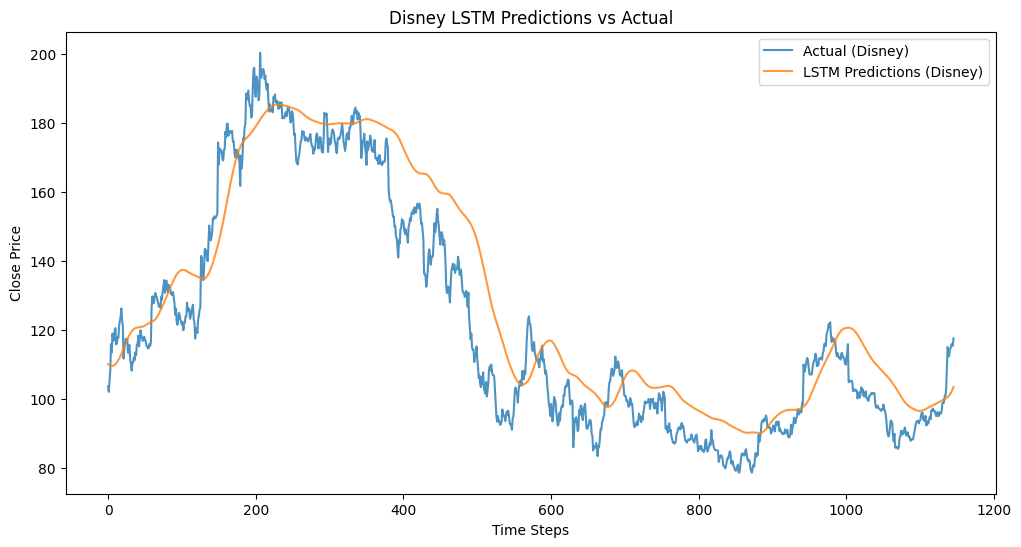

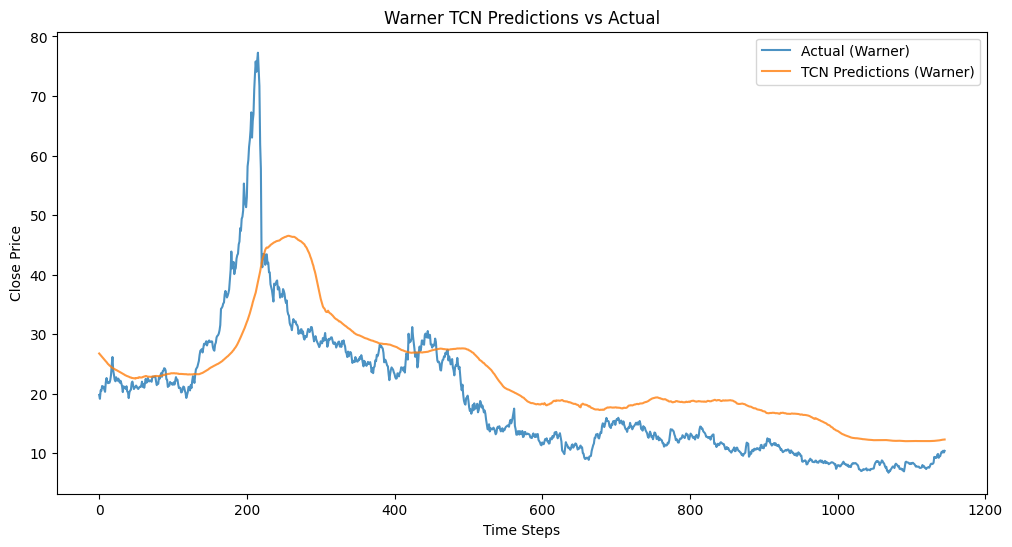

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler  # Ensure MinMaxScaler is imported
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# creating sequence to reuse for both models
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)


#LSTM Model (Disney)
disney_testing_file_path = 'datasets/testing_disney.csv'
disney_testing_data = pd.read_csv(disney_testing_file_path)
disney_testing_data.columns = disney_testing_data.columns.str.lower()
disney_test_close_values = disney_testing_data['close'].values.reshape(-1, 1)

#normalizing and creating sequences
disney_scaler = MinMaxScaler(feature_range=(0, 1))
disney_test_scaled = disney_scaler.fit_transform(disney_test_close_values)
time_steps = 90
X_disney_test, y_disney_test = create_sequences(disney_test_scaled, time_steps)

# loading Disney LSTM model
disney_lstm_model = load_model('best_disney_model_lstm.keras')
disney_predictions = disney_lstm_model.predict(X_disney_test)
disney_predictions = disney_scaler.inverse_transform(disney_predictions)
y_disney_test = disney_scaler.inverse_transform(y_disney_test)

# metrics for Disney model
disney_mse = mean_squared_error(y_disney_test, disney_predictions)
disney_mae = mean_absolute_error(y_disney_test, disney_predictions)
disney_r2 = r2_score(y_disney_test, disney_predictions)

# TCN model (Warner)
warner_testing_file_path = 'datasets/testing_warner.csv'
warner_testing_data = pd.read_csv(warner_testing_file_path)
warner_testing_data.columns = warner_testing_data.columns.str.lower()
warner_test_close_values = warner_testing_data['close'].values.reshape(-1, 1)

# normalizing and creating sequences
warner_scaler = MinMaxScaler(feature_range=(0, 1))
warner_test_scaled = warner_scaler.fit_transform(warner_test_close_values)
X_warner_test, y_warner_test = create_sequences(warner_test_scaled, time_steps)

# loading Warner model
warner_tcn_model = load_model('best_warner_tcn_model.keras')
warner_predictions = warner_tcn_model.predict(X_warner_test)
warner_predictions = warner_scaler.inverse_transform(warner_predictions)
y_warner_test = warner_scaler.inverse_transform(y_warner_test)

# metrics for Warner model
warner_mse = mean_squared_error(y_warner_test, warner_predictions)
warner_mae = mean_absolute_error(y_warner_test, warner_predictions)
warner_r2 = r2_score(y_warner_test, warner_predictions)


#metrics comparison

print("Disney LSTM Model Performance:")
print(f"  MSE: {disney_mse:.4f}")
print(f"  MAE: {disney_mae:.4f}")
print(f"  R²: {disney_r2:.4f}")

print("\nWarner TCN Model Performance:")
print(f"  MSE: {warner_mse:.4f}")
print(f"  MAE: {warner_mae:.4f}")
print(f"  R²: {warner_r2:.4f}")

#plotting predicted vs actual values basing on time steps
# Disney LSTM
plt.figure(figsize=(12, 6))
plt.plot(y_disney_test, label='Actual (Disney)', alpha=0.8)
plt.plot(disney_predictions, label='LSTM Predictions (Disney)', alpha=0.8)
plt.title('Disney LSTM Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Warner TCN
plt.figure(figsize=(12, 6))
plt.plot(y_warner_test, label='Actual (Warner)', alpha=0.8)
plt.plot(warner_predictions, label='TCN Predictions (Warner)', alpha=0.8)
plt.title('Warner TCN Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Conclusion
Disney LSTM model perfomed well, especially in terms of capturing data variance, indicating the model captures patterns and trends well but it has high MAE and MSE. On the other hand we have Warner Bros TCN model that has lower MAE and MSE so it shows closer predictions on average, however the model struggles with explaining the variance in the data, so it could mean that it struggles to capture underlying patterns in the data. 